# Import necessary dependencies and settings

In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

# Threshold based methods

## Limiting features in bag of word based models

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.1, max_df=0.85, max_features=2000)
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.85, max_features=2000, min_df=0.1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Variance based thresholding

In [3]:
df = pd.read_csv('datasets/Pokemon.csv')
poke_gen = pd.get_dummies(df['Generation'])
poke_gen.head()

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [4]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=.15)
vt.fit(poke_gen)

VarianceThreshold(threshold=0.15)

In [5]:
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=poke_gen.columns).T

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
variance,0.164444,0.114944,0.16,0.128373,0.163711,0.0919937
select_feature,True,False,True,False,True,False


In [6]:
poke_gen_subset = poke_gen.iloc[:,vt.get_support()].head()
poke_gen_subset

,Gen 1,Gen 3,Gen 5
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
poke_gen_subset = poke_gen.iloc[:,vt.get_support()].head()
poke_gen_subset

,Gen 1,Gen 3,Gen 5
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


# Statistical Methods

In [8]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
bc_features = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
bc_classes = pd.DataFrame(bc_data.target, columns=['IsMalignant'])

# build featureset and response class labels 
bc_X = np.array(bc_features)
bc_y = np.array(bc_classes).T[0]
print('Feature set shape:', bc_X.shape)
print('Response class shape:', bc_y.shape)

Feature set shape: (569, 30)
Response class shape: (569,)


In [9]:
np.set_printoptions(threshold=30)
print('Feature set data [shape: '+str(bc_X.shape)+']')
print(np.round(bc_X, 2), '\n')
print('Feature names:')
print(np.array(bc_features.columns), '\n')
print('Predictor Class label data [shape: '+str(bc_y.shape)+']')
print(bc_y, '\n')
print('Predictor name:', np.array(bc_classes.columns))
np.set_printoptions(threshold=pt)

Feature set data [shape: (569, 30)]
[[ 17.99  10.38 122.8  ...   0.27   0.46   0.12]
 [ 20.57  17.77 132.9  ...   0.19   0.28   0.09]
 [ 19.69  21.25 130.   ...   0.24   0.36   0.09]
 ...
 [ 16.6   28.08 108.3  ...   0.14   0.22   0.08]
 [ 20.6   29.33 140.1  ...   0.26   0.41   0.12]
 [  7.76  24.54  47.92 ...   0.     0.29   0.07]] 

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Predictor Class label data [shape: (569,)]
[0 0 0 ... 0 0 1] 

Predictor name: ['IsMaligna

In [10]:
from sklearn.feature_selection import chi2, SelectKBest

skb = SelectKBest(score_func=chi2, k=15)
skb.fit(bc_X, bc_y)

SelectKBest(k=15, score_func=<function chi2 at 0x0000019BAD1CABF8>)

In [11]:
feature_scores = [(item, score) for item, score in zip(bc_data.feature_names, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

[('worst area', 112598.43156405364),
 ('mean area', 53991.65592375089),
 ('area error', 8758.50470533447),
 ('worst perimeter', 3665.035416340591),
 ('mean perimeter', 2011.102863767905),
 ('worst radius', 491.68915743332195),
 ('mean radius', 266.104917195178),
 ('perimeter error', 250.57189635982184),
 ('worst texture', 174.44939960571074),
 ('mean texture', 93.89750809863335)]

In [12]:
select_features_kbest = skb.get_support()
feature_names_kbest = bc_data.feature_names[select_features_kbest]
feature_subset_df = bc_features[feature_names_kbest]
bc_SX = np.array(feature_subset_df)
print(bc_SX.shape)
print(feature_names_kbest)

(569, 15)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concavity' 'radius error' 'perimeter error' 'area error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst compactness' 'worst concavity' 'worst concave points']


In [13]:
np.round(feature_subset_df.iloc[20:25], 2)

,mean radius,mean texture,mean perimeter,mean area,mean concavity,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
20,13.08,15.71,85.63,520.0,0.05,0.19,1.38,14.67,14.50,20.49,96.09,630.5,0.28,0.19,0.07
21,9.50,12.44,60.34,273.9,0.03,0.28,1.91,15.70,10.23,15.66,65.13,314.9,0.11,0.09,0.06
22,15.34,14.26,102.50,704.4,0.21,0.44,3.38,44.91,18.07,19.08,125.10,980.9,0.60,0.63,0.24
23,21.16,23.04,137.20,1404.0,0.11,0.69,4.30,93.99,29.17,35.59,188.00,2615.0,0.26,0.32,0.20
24,16.65,21.38,110.00,904.6,0.15,0.81,5.46,102.60,26.46,31.56,177.00,2215.0,0.36,0.47,0.21


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# build logistic regression model
lr = LogisticRegression()

# evaluating accuracy for model built on full featureset
full_feat_acc = np.average(cross_val_score(lr, bc_X, bc_y, scoring='accuracy', cv=5))
# evaluating accuracy for model built on selected featureset
sel_feat_acc = np.average(cross_val_score(lr, bc_SX, bc_y, scoring='accuracy', cv=5))

print('Model accuracy statistics with 5-fold cross validation')
print('Model accuracy with complete feature set', bc_X.shape, ':', full_feat_acc)
print('Model accuracy with selected feature set', bc_SX.shape, ':', sel_feat_acc)

Model accuracy statistics with 5-fold cross validation
Model accuracy with complete feature set (569, 30) : 0.9509041939207385
Model accuracy with selected feature set (569, 15) : 0.9526433243555215


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Recursive Feature Elimination

In [15]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=15, step=1)
rfe.fit(bc_X, bc_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [16]:
select_features_rfe = rfe.get_support()
feature_names_rfe = bc_data.feature_names[select_features_rfe]
print(feature_names_rfe)

['mean radius' 'mean texture' 'mean perimeter' 'mean smoothness'
 'mean concavity' 'mean concave points' 'mean symmetry' 'texture error'
 'worst radius' 'worst texture' 'worst smoothness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
set(feature_names_kbest) & set(feature_names_rfe)

{'mean concavity',
 'mean perimeter',
 'mean radius',
 'mean texture',
 'worst concave points',
 'worst concavity',
 'worst radius',
 'worst texture'}

# Model based selection

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(bc_X, bc_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(bc_data.feature_names, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

[('mean concave points', 0.22296533886254463),
 ('worst area', 0.18101577090850335),
 ('worst concave points', 0.16278620226961604),
 ('worst perimeter', 0.08349466808488724),
 ('mean perimeter', 0.06761716229014385),
 ('mean area', 0.061649955251209455),
 ('worst radius', 0.03284962991838974),
 ('worst texture', 0.03061269747494793),
 ('worst fractal dimension', 0.016392203557412),
 ('area error', 0.015004506966537995)]

# Feature extraction using dimensionality reduction

In [20]:
# center the feature set
bc_XC = bc_X - bc_X.mean(axis=0)

# decompose using SVD
U, S, VT = np.linalg.svd(bc_XC)

# get principal components
PC = VT.T

# get first 3 principal components
PC3 = PC[:, 0:3]
PC3.shape

(30, 3)

In [21]:
# reduce feature set dimensionality 
np.round(bc_XC.dot(PC3), 2)

array([[-1160.14,  -293.92,   -48.58],
       [-1269.12,    15.63,    35.39],
       [ -995.79,    39.16,     1.71],
       ...,
       [ -314.5 ,    47.55,    10.44],
       [-1124.86,    34.13,    19.74],
       [  771.53,   -88.64,   -23.89]])

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(bc_X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649, 0.00155751])

In [24]:
bc_pca = pca.transform(bc_X)
np.round(bc_pca, 2)

array([[1160.14, -293.92,   48.58],
       [1269.12,   15.63,  -35.39],
       [ 995.79,   39.16,   -1.71],
       ...,
       [ 314.5 ,   47.55,  -10.44],
       [1124.86,   34.13,  -19.74],
       [-771.53,  -88.64,   23.89]])

In [25]:
np.average(cross_val_score(lr, bc_pca, bc_y, scoring='accuracy', cv=5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.9280800307810695

# Import necessary dependencies and settings

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

# Raw Measures

## Values

In [27]:
poke_df = pd.read_csv('datasets/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [28]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [29]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


## Counts

In [30]:
popsong_df = pd.read_csv('datasets/song_views.csv', encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


# Binarization

In [31]:
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [32]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


# Rounding

In [33]:
items_popularity = pd.read_csv('datasets/item_popularity.csv', encoding='utf-8')
items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [34]:
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


# Interactions

In [35]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [36]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [37]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [38]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features.head(5)  

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


## Transforming new data in the future (during predictions)

In [39]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]], 
                      columns=['Attack', 'Defense'])
new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [40]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res, 
                                 columns=['Attack', 'Defense', 
                                          'Attack^2', 'Attack x Defense', 'Defense^2'])
new_intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


# Binning

In [41]:
fcc_survey_df = pd.read_csv('datasets/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## Fixed-width binning

### Developer age distribution

Text(0, 0.5, 'Frequency')

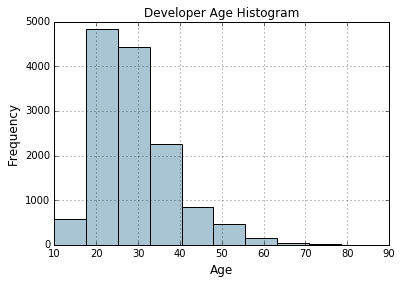

In [42]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### Binning based on rounding

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [43]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


### Binning based on custom ranges

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [44]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## Quantile based binning

In [45]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

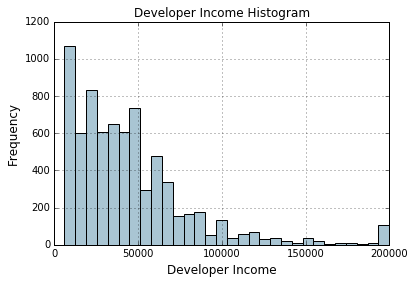

In [46]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [47]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

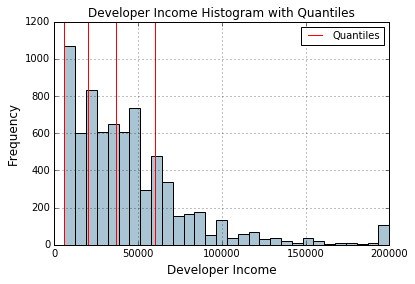

In [48]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [49]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


# Mathematical Transformations

## Log transform

In [50]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

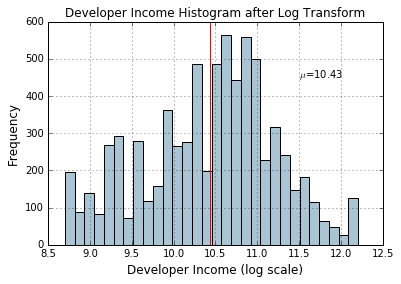

In [51]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

## Box–Cox transform

In [52]:
# get optimal lambda value from non null income values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799123945557663


In [53]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((1+fcc_survey_df['Income']), 
                                                         lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'], 
                                                           lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 
               'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1031: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180668
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115342
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346420
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115342
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637131


Text(24, 450, '$\\mu$=20.65')

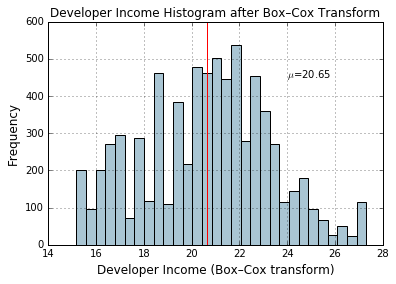

In [54]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)

# Import necessary dependencies and settings

In [55]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
import pytz

# Load and process sample temporal data

In [56]:
time_stamps = ['2015-03-08 10:30:00.360000+00:00', '2017-07-13 15:45:05.755000-07:00',
               '2012-01-20 22:30:00.254000+05:30', '2016-12-25 00:30:00.000000+10:00']
df = pd.DataFrame(time_stamps, columns=['Time'])
df

,Time
0,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00


In [57]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df['TS_obj'] = ts_objs
ts_objs

array([Timestamp('2015-03-08 10:30:00.360000+0000', tz='UTC'),
       Timestamp('2017-07-13 15:45:05.755000-0700', tz='pytz.FixedOffset(-420)'),
       Timestamp('2012-01-20 22:30:00.254000+0530', tz='pytz.FixedOffset(330)'),
       Timestamp('2016-12-25 00:30:00+1000', tz='pytz.FixedOffset(600)')],
      dtype=object)

# Date based features

In [58]:
df['Year'] = df['TS_obj'].apply(lambda d: d.year)
df['Month'] = df['TS_obj'].apply(lambda d: d.month)
df['Day'] = df['TS_obj'].apply(lambda d: d.day)
df['DayOfWeek'] = df['TS_obj'].apply(lambda d: d.dayofweek)
df['DayName'] = df['TS_obj'].apply(lambda d: d.weekday_name)
df['DayOfYear'] = df['TS_obj'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['TS_obj'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['TS_obj'].apply(lambda d: d.quarter)

df[['Time', 'Year', 'Month', 'Day', 'Quarter', 
    'DayOfWeek', 'DayName', 'DayOfYear', 'WeekOfYear']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


,Time,Year,Month,Day,Quarter,DayOfWeek,DayName,DayOfYear,WeekOfYear
0,2015-03-08 10:30:00.360000+00:00,2015,3,8,1,6,Sunday,67,10
1,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,3,Thursday,194,28
2,2012-01-20 22:30:00.254000+05:30,2012,1,20,1,4,Friday,20,3
3,2016-12-25 00:30:00.000000+10:00,2016,12,25,4,6,Sunday,360,51


# Time based features

In [59]:
df['Hour'] = df['TS_obj'].apply(lambda d: d.hour)
df['Minute'] = df['TS_obj'].apply(lambda d: d.minute)
df['Second'] = df['TS_obj'].apply(lambda d: d.second)
df['MUsecond'] = df['TS_obj'].apply(lambda d: d.microsecond)
df['UTC_offset'] = df['TS_obj'].apply(lambda d: d.utcoffset())

df[['Time', 'Hour', 'Minute', 'Second', 'MUsecond', 'UTC_offset']]

,Time,Hour,Minute,Second,MUsecond,UTC_offset
0,2015-03-08 10:30:00.360000+00:00,10,30,0,360000,00:00:00
1,2017-07-13 15:45:05.755000-07:00,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,22,30,0,254000,05:30:00
3,2016-12-25 00:30:00.000000+10:00,0,30,0,0,10:00:00


In [60]:
hour_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['TimeOfDayBin'] = pd.cut(df['Hour'], 
                            bins=hour_bins, labels=bin_names)
df[['Time', 'Hour', 'TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,10,Morning
1,2017-07-13 15:45:05.755000-07:00,15,Afternoon
2,2012-01-20 22:30:00.254000+05:30,22,Night
3,2016-12-25 00:30:00.000000+10:00,0,Late Night


In [61]:
df['TZ_info'] = df['TS_obj'].apply(lambda d: d.tzinfo)
df['TimeZones'] = df['TS_obj'].apply(lambda d: list({d.astimezone(tz).tzname() 
                                   for tz in map(pytz.timezone, 
                                                 pytz.all_timezones_set)
                                       if d.astimezone(tz).utcoffset() == d.utcoffset()}))

df[['Time', 'UTC_offset', 'TZ_info', 'TimeZones']]

,Time,UTC_offset,TZ_info,TimeZones
0,2015-03-08 10:30:00.360000+00:00,00:00:00,UTC,"[GMT, WET, UTC, +00, UCT]"
1,2017-07-13 15:45:05.755000-07:00,-1 days +17:00:00,pytz.FixedOffset(-420),"[MST, -07, PDT]"
2,2012-01-20 22:30:00.254000+05:30,05:30:00,pytz.FixedOffset(330),"[IST, +0530]"
3,2016-12-25 00:30:00.000000+10:00,10:00:00,pytz.FixedOffset(600),"[AEST, ChST, +10]"


In [62]:
df['TimeUTC'] = df['TS_obj'].apply(lambda d: d.tz_convert(pytz.utc))
df['Epoch'] = df['TimeUTC'].apply(lambda d: d.timestamp())
df['GregOrdinal'] = df['TimeUTC'].apply(lambda d: d.toordinal())

df[['Time', 'TimeUTC', 'Epoch', 'GregOrdinal']]

,Time,TimeUTC,Epoch,GregOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,1.425811e+09,735665
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,1.499986e+09,736523
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,1.327079e+09,734522
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,1.482590e+09,736322


In [63]:
curr_ts = datetime.datetime.now(pytz.utc)
# compute days elapsed since today
df['DaysElapsedEpoch'] = (curr_ts.timestamp() - df['Epoch']) / (3600*24)
df['DaysElapsedOrdinal'] = (curr_ts.toordinal() - df['GregOrdinal']) 

df[['Time', 'TimeUTC', 'DaysElapsedEpoch', 'DaysElapsedOrdinal']]

,Time,TimeUTC,DaysElapsedEpoch,DaysElapsedOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,1639.312549,1639
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,780.802070,781
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,2782.041717,2782
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,982.145886,982


# Import necessary dependencies and settings

In [64]:
import pandas as pd
import numpy as np

# Transforming Nominal Features

In [65]:
vg_df = pd.read_csv('datasets/vgsales.csv', encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [66]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [67]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [68]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


# Transforming Ordinal Features

In [69]:
poke_df = pd.read_csv('datasets/Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)

np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [70]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3, 
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}

poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


# Encoding Categorical Features

## One-hot Encoding Scheme

In [71]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4:10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

# transform and map pokemon legendary status
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels

poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [73]:
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)

# encode legendary status labels using one-hot encoding scheme
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [74]:
poke_df_ohe = pd.concat([poke_df_sub, gen_features, leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'],gen_feature_labels,
              ['Legendary', 'Lgnd_Label'],leg_feature_labels], [])
poke_df_ohe[columns].iloc[4:10]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
4,Octillery,Gen 2,1,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5,Helioptile,Gen 6,5,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
6,Dialga,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,True,1,0.0,1.0
7,DeoxysDefense Forme,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
8,Rapidash,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
9,Swanna,Gen 5,4,0.0,0.0,0.0,0.0,1.0,0.0,False,0,1.0,0.0


In [75]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3', True], 
                           ['CharMyToast', 'Gen 4', False]],
                           columns=['Name', 'Generation', 'Legendary'])
new_poke_df

,Name,Generation,Legendary
0,PikaZoom,Gen 3,True
1,CharMyToast,Gen 4,False


In [76]:
new_gen_labels = gen_le.transform(new_poke_df['Generation'])
new_poke_df['Gen_Label'] = new_gen_labels

new_leg_labels = leg_le.transform(new_poke_df['Legendary'])
new_poke_df['Lgnd_Label'] = new_leg_labels

new_poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
0,PikaZoom,Gen 3,2,True,1
1,CharMyToast,Gen 4,3,False,0


In [77]:
new_gen_feature_arr = gen_ohe.transform(new_poke_df[['Gen_Label']]).toarray()
new_gen_features = pd.DataFrame(new_gen_feature_arr, columns=gen_feature_labels)

new_leg_feature_arr = leg_ohe.transform(new_poke_df[['Lgnd_Label']]).toarray()
new_leg_features = pd.DataFrame(new_leg_feature_arr, columns=leg_feature_labels)

new_poke_ohe = pd.concat([new_poke_df, new_gen_features, new_leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'], gen_feature_labels,
               ['Legendary', 'Lgnd_Label'], leg_feature_labels], [])
new_poke_ohe[columns]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,False,0,1.0,0.0


In [78]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,0,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0,1
6,Dialga,Gen 4,0,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0,0
8,Rapidash,Gen 1,1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1,0


## Dummy Coding Scheme

In [79]:
gen_dummy_features = pd.get_dummies(poke_df['Generation'], drop_first=True)
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,1
6,Dialga,Gen 4,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,1,0,0,0
8,Rapidash,Gen 1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,1,0


In [80]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_dummy_features = gen_onehot_features.iloc[:,:-1]
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0,1,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0
6,Dialga,Gen 4,0,0,0,1,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0
8,Rapidash,Gen 1,1,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1


## Effect Coding Scheme

In [81]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_effect_features = gen_onehot_features.iloc[:,:-1]
gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
pd.concat([poke_df[['Name', 'Generation']], gen_effect_features], axis=1).iloc[4:10]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0.0,1.0,0.0,0.0,0.0
5,Helioptile,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
6,Dialga,Gen 4,0.0,0.0,0.0,1.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,0.0,1.0,0.0,0.0
8,Rapidash,Gen 1,1.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,0.0,1.0


## Feature Hashing scheme

In [82]:
unique_genres = np.unique(vg_df[['Genre']])
print("Total game genres:", len(unique_genres))
print(unique_genres)

Total game genres: 12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [83]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(vg_df['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


# Import necessary dependencies and settings

In [84]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

# Image metadata features

 - Image create date & time
 - Image dimensions
 - Image compression format
 - Device Make & Model
 - Image resolution & aspect ratio
 - Image Artist
 - Flash, Aperture, Focal Length & Exposure

# Raw Image and channel pixel values

In [85]:
cat = io.imread('datasets/cat.png')
dog = io.imread('datasets/dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])


print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


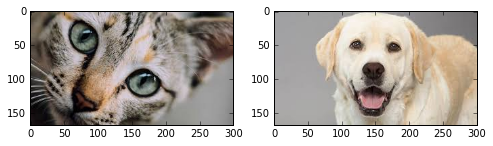

In [86]:
#coffee = skimage.transform.resize(coffee, (300, 451), mode='reflect')
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog)

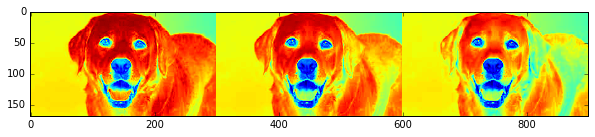

In [87]:
dog_r = dog[:,:,0]
dog_g = dog[:,:,1]
dog_b = dog[:,:,2]
plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

In [88]:
dog_r

array([[160, 160, 160, ..., 113, 113, 112],
       [160, 160, 160, ..., 113, 113, 112],
       [160, 160, 160, ..., 113, 113, 112],
       ...,
       [165, 165, 165, ..., 212, 211, 210],
       [165, 165, 165, ..., 210, 210, 209],
       [164, 164, 164, ..., 209, 209, 209]], dtype=uint8)

# Grayscale image pixel values

In [89]:
from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image shape:', cgs.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (168, 300) 

2D image pixel map
[[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]] 

Flattened pixel map: [0.42 0.41 0.41 ... 0.51 0.51 0.51]


# Binning image intensity distribution

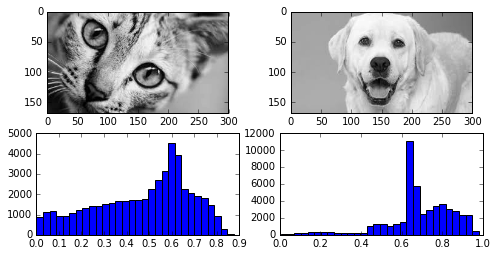

In [90]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

# Image aggregation statistics

## RGB ranges

In [91]:
from scipy.stats import describe

cat_rgb = cat.reshape((168*300), 3).T
dog_rgb = dog.reshape((168*300), 3).T

cs = describe(cat_rgb, axis=1)
ds = describe(dog_rgb, axis=1)

cat_rgb_range = cs.minmax[1] - cs.minmax[0]
dog_rgb_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range], 
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,Cat,240,223,235
1,Dog,246,250,246


# Descriptive aggregations

In [92]:
cat_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([cat_stats, dog_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,Cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,Dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0


# Edge detection

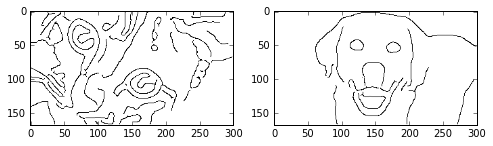

In [93]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_edges, cmap='binary')

# Object detection 

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


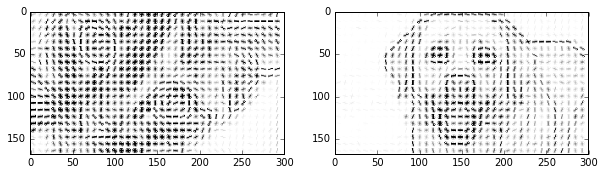

In [94]:
from skimage.feature import hog
from skimage import exposure

fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)

# rescaling intensity to get better plots
cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_hogs, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_hogs, cmap='binary')

In [95]:
print(fd_cat, fd_cat.shape)

[0.00535218 0.00274414 0.0212781  ... 0.         0.         0.        ] (47880,)


# Import necessary dependencies and settings

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

# Load sample data of video views

In [97]:
views = pd.DataFrame([1295., 25., 19000., 5., 1., 300.], columns=['views'])
views

,views
0,1295.0
1,25.0
2,19000.0
3,5.0
4,1.0
5,300.0


# Standard Scaler $\frac{x_i - \mu}{\sigma}$

In [98]:
ss = StandardScaler()
views['zscore'] = ss.fit_transform(views[['views']])
views

,views,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


In [99]:
vw = np.array(views['views'])
(vw[0] - np.mean(vw)) / np.std(vw)

-0.30721413311687235

# Min-Max Scaler $\frac{x_i - min(x)}{max(x) - min(x)}$

In [100]:
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['views']])
views

,views,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


In [101]:
(vw[0] - np.min(vw)) / (np.max(vw) - np.min(vw))

0.06810884783409653

# Robust Scaler $\frac{x_i - median(x)}{IQR_{(1,3)}(x)}$

In [102]:
rs = RobustScaler()
views['robust'] = rs.fit_transform(views[['views']])
views

,views,zscore,minmax,robust
0,1295.0,-0.307214,0.068109,1.092883
1,25.0,-0.489306,0.001263,-0.132690
2,19000.0,2.231317,1.000000,18.178528
3,5.0,-0.492173,0.000211,-0.151990
4,1.0,-0.492747,0.000000,-0.155850
5,300.0,-0.449877,0.015738,0.132690


In [103]:
quartiles = np.percentile(vw, (25., 75.))
iqr = quartiles[1] - quartiles[0]
(vw[0] - np.median(vw)) / iqr

1.0928829915560916

# Initialize dependencies and get data

In [104]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Using TensorFlow backend.


# Pre-process image data

In [105]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [106]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build a CNN based deep neural network

In [107]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W0902 23:30:22.884425 10944 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 23:30:22.931298 10944 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 23:30:22.946926 10944 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 23:30:23.025041 10944 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0902 23:30:23.040665 10944 deprecation_wrapper.py:119] From C:\ProgramData\Ana

# Visualize the network architecture

In [108]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [109]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [ ]:
pip install GraphViz

# Build the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          verbose=1,
          validation_data=(x_test, y_test))

# Predict and test model performance

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])